In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_global = pd.read_parquet('/Users/manu/Desktop/SUP/Projet 2/AI_model_urban_mobility/data/df_final_15min_NoNan_20250505.parquet')

In [3]:
df_prediction_taux_occupation = pd.read_csv('/Users/manu/Desktop/SUP/Projet 2/AI_model_urban_mobility/data/donnees_predictions/taux_occupation_predictions.csv')

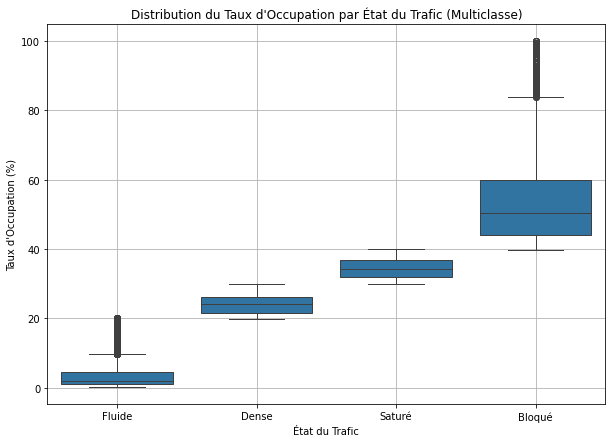

In [4]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='etat_du_trafic', y='taux_occupation', data=df_global, 
            order=['Fluide', 'Dense', 'Saturé', 'Bloqué'])

plt.title("Distribution du Taux d'Occupation par État du Trafic (Multiclasse)")
plt.xlabel("État du Trafic")
plt.ylabel("Taux d'Occupation (%)")
plt.grid(True)
plt.show()

In [5]:
summary_stats = df_global.groupby('etat_du_trafic')['taux_occupation'].describe()

print("--- Valeurs Numériques des Boxplots ---")
print(summary_stats)

--- Valeurs Numériques des Boxplots ---
                    count       mean        std        min        25%    50%  \
etat_du_trafic                                                                 
Bloqué            12381.0  54.002823  12.729300  39.825000  44.100000  50.40   
Dense             21877.0  24.149998   2.734200  19.950000  21.600000  24.10   
Fluide          1836582.0   3.443077   3.410669   0.200000   1.015385   2.05   
Saturé             9899.0  34.430755   2.856305  29.833333  32.000000  34.10   

                  75%      max  
etat_du_trafic                  
Bloqué          60.00  100.000  
Dense           26.20   29.975  
Fluide           4.55   19.975  
Saturé          36.85   39.975  


In [6]:
def get_etat_trafic(taux_occupation):
    if taux_occupation < 19.9:
        return 'Fluide'
    elif taux_occupation < 29.9: 
        return 'Dense'
    elif taux_occupation < 39.9: 
        return 'Saturé'
    else:
        return 'Bloqué'


In [7]:
df_prediction_taux_occupation['etat_trafic_predit'] = df_prediction_taux_occupation['taux_occupation_pred'].apply(get_etat_trafic)

In [8]:
df_global['heure_arrondie'] = pd.to_datetime(df_global['heure_arrondie'])
df_prediction_taux_occupation['heure_arrondie'] = pd.to_datetime(df_prediction_taux_occupation['heure_arrondie'])

df_eval = pd.merge(
    df_prediction_taux_occupation,
    df_global,
    on=['heure_arrondie', 'nom_du_troncon']
)

In [9]:
y_pred = df_eval['etat_trafic_predit']
y_true = df_eval['etat_du_trafic']
target_names = ['Fluide', 'Dense', 'Saturé', 'Bloqué']
print(classification_report(y_true, y_pred, labels=target_names))

              precision    recall  f1-score   support

      Fluide       0.99      0.99      0.99    422099
       Dense       0.18      0.18      0.18      4497
      Saturé       0.16      0.13      0.14      2142
      Bloqué       0.37      0.16      0.22      2686

    accuracy                           0.97    431424
   macro avg       0.42      0.36      0.38    431424
weighted avg       0.97      0.97      0.97    431424




--- Matrice de Confusion (Modèle par Seuils Mlticlasse) ---


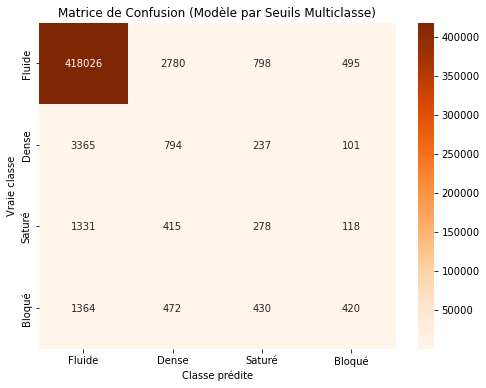

In [13]:
labels_for_metrics = [0, 1, 2, 3] 
target_names_ordered = ['Fluide', 'Dense', 'Saturé', 'Bloqué']
print("\n--- Matrice de Confusion (Modèle par Seuils Mlticlasse) ---")
cm = confusion_matrix(y_true, y_pred, labels=target_names_ordered)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=target_names_ordered, 
            yticklabels=target_names_ordered)

plt.title('Matrice de Confusion (Modèle par Seuils Multiclasse)')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()